In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ruta = '../DATASETS/business_corregido.csv' 

In [3]:
df_business = pd.read_csv(ruta)

In [4]:
df_business.head()

,Unnamed: 0,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
0,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Los Angeles,CA,34.1141,-118.4068,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Miami,FL,25.7840,-80.2101,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
2,13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,San Francisco,CA,37.7558,-122.4449,5.0,10,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."
3,14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,San Diego,CA,32.8313,-117.1222,4.5,100,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
4,16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tampa,FL,27.9945,-82.4447,4.5,10,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


In [5]:
df_business = df_business[df_business["city"] != "Philadelphia"]

## Tasa de satisfaccion del cliente

Éste es un indicador clave de rendimiento (KPI) que se utiliza para medir el nivel de satisfacción general de los clientes con un producto, servicio o experiencia.

Objetivo del KPI:

El objetivo principal del TSAL es identificar áreas de mejora en la experiencia del cliente y evaluar el éxito de las iniciativas implementadas para mejorar la satisfacción.
y garantizar una tasa de satisfaccion  del minimo 75% 

Peridiocidad
 trimestral

Calculo de percentiles

In [6]:
percentil_25 = df_business["stars"].quantile(0.25)
percentil_75 = df_business["stars"].quantile(0.75)

In [7]:
df_business["kpi_tsal"] = (df_business["stars"] - percentil_25) / (percentil_75 - percentil_25) * 100

# Penalizar valores negativos:
df_business["kpi_tsal"] = np.where(df_business["kpi_tsal"] < 0, 0, df_business["kpi_tsal"])

meta_satisfaccion = 0.75
df_business["cumple_kpi"] = np.where(df_business["kpi_tsal"] >= meta_satisfaccion, 1, 0)

Obtenemos el dataframe con dos nuevas columnas la del kpi (tasa se satisfaccion del cliente), con las cueles podemos realiar visualiaciones y analisis para conseguir cumplir con el objetivo

### Establecimientos que no cumplen con el kpi

In [8]:
df_business_no_cumple = df_business[df_business["cumple_kpi"] == 0]

Agrupamos por estado y por ciudad

In [9]:
# Agrupamos por estados
df_no_cumple_ciudad = df_business_no_cumple.groupby("city")["cumple_kpi"].count()
df_no_cumple_estado = df_business_no_cumple.groupby("state")["cumple_kpi"].count()

In [10]:
print("La ciudad con mayor número de empresas que no cumplen:")
print(df_no_cumple_ciudad.sort_values(ascending=False).head(10))

print("El estado con mayor número de empresas que no cumplen:")
print(df_no_cumple_estado.sort_values(ascending=False).head(1))

La ciudad con mayor número de empresas que no cumplen:
city
Garden Grove        2
Beverly Hills       2
Adin                1
Paxton              1
Panama City         1
Paradise            1
Paradise Heights    1
Parklawn            1
Parkway             1
Pasatiempo          1
Name: cumple_kpi, dtype: int64
El estado con mayor número de empresas que no cumplen:
state
CA    385
Name: cumple_kpi, dtype: int64


#### Top de ciudades con mayor numero de empresas que no cumplen con el objetivo del 75% de satisfaccion del cliente

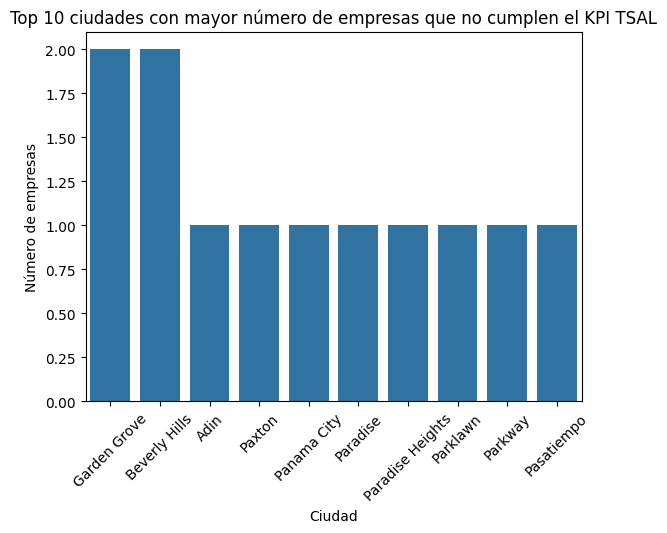

In [11]:
# Ordena el DataFrame por número de empresas que no cumplen
df_no_cumple_ciudad_ordenado = df_no_cumple_ciudad.sort_values(ascending=False)

# Selecciona las 10 ciudades con el mayor número de empresas que no cumplen
top_10_ciudades = df_no_cumple_ciudad_ordenado.head(10)

# Crea el gráfico de barras
sns.barplot(x=top_10_ciudades.index, y=top_10_ciudades.values)

# Establece el título y las etiquetas del gráfico
plt.title("Top 10 ciudades con mayor número de empresas que no cumplen el KPI TSAL")
plt.xlabel("Ciudad")
plt.ylabel("Número de empresas")

# Rota las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()


La ciudad con la mayor cantidad de empresas que no cumplen es Philadelphia, con más de 1200 empresas.

Las ciudades con menor cantidad de empresas que no cumplen son Boise y New Orleans, con alrededor de 200 empresas cada una.

La diferencia en la cantidad de empresas que no cumplen entre las ciudades es considerable.

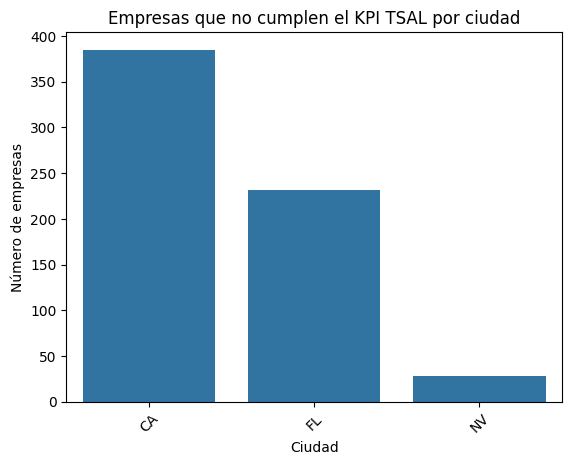

In [12]:
# Agrupa el DataFrame por ciudad y suma el número de empresas sin cumplir
df_no_cumple_ciudad = df_business_no_cumple.groupby("state")["cumple_kpi"].count()

# Crea el gráfico de barras
sns.barplot(x=df_no_cumple_ciudad.index, y=df_no_cumple_ciudad.values)

# Establece el título y las etiquetas del gráfico
plt.title("Empresas que no cumplen el KPI TSAL por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Número de empresas")

# Rota las etiquetas del eje X para evitar superposición
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()

Las ciudades con mayor incumplimiento se encuentran en estados con un valor promedio del KPI TSAL .
Los estados con un valor promedio del KPI TSAL más alto (Imagen 2) no necesariamente tienen las ciudades con el menor incumplimiento (Imagen 1).

### Distribucion por empresas

Podemos ver el top 10 de las empresas que peor cumplen con el objetivo de un minimo del 75% de satisfaccion en sus clientes

In [13]:
df_no_cumple_empresa = df_business_no_cumple.groupby(["name", "categories"])["cumple_kpi"].count()
df_no_cumple_empresa.sort_values(ascending=False).head(10)

name            categories                                    
Dunkin'         Food, Donuts, Coffee & Tea                        3
Starbucks       Food, Coffee & Tea                                3
Wendy's         Fast Food, Burgers, Restaurants                   2
Dunkin'         Coffee & Tea, Donuts, Food                        2
Public Storage  Self Storage, Local Services                      2
White Castle    Restaurants, Fast Food, Burgers                   2
Subway          Restaurants, Sandwiches, Fast Food                2
Starbucks       Food, Coffee & Tea, Restaurants                   2
RaceWay         Gas Stations, Automotive                          1
RR Racing       Auto Parts & Supplies, Automotive, Auto Repair    1
Name: cumple_kpi, dtype: int64

Se puede observar que el top 10 de estas empresas esta conformado en su mayoria por empresas del sector gastronomico, que a su vez son cadenas que funcionan a nivel nacional e itenacional mediante franquicias

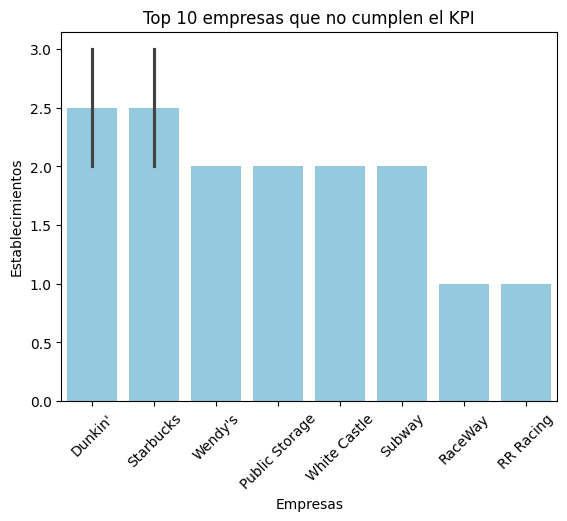

In [14]:
# Reorder by "categories"
df_no_cumple_empresa_ordenado = df_no_cumple_empresa.sort_values(ascending=False)

# Select the top 10 categories with their corresponding number of companies
top_10_categorias = df_no_cumple_empresa_ordenado.head(10)

# Reset the index to remove the MultiIndex
top_10_categorias = top_10_categorias.reset_index()

# Create the bar chart
sns.barplot(x=top_10_categorias["name"], y=top_10_categorias["cumple_kpi"], color="skyblue")

# Personalize the chart
plt.title("Top 10 empresas que no cumplen el KPI")
plt.xlabel("Empresas")
plt.ylabel("Establecimientos")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


Como podemos observar son empresas que cuentan con varios establecimientos o franquicias y en su mayoria se desenvuielven en el area gastronomica

### Establecimientos que si cumplen con el kpi

In [15]:
df_no_cumple_empresa = df_business_no_cumple.groupby(["name", "categories"])["cumple_kpi"].count()
df_no_cumple_empresa.sort_values(ascending=True).head(10)

name                                                 categories                                                                                               
1925 Cocktail Lounge                                 Restaurants, Bars, Adult Entertainment, Lounges, American (New), Nightlife                                   1
Popeyes Louisiana Kitchen                            American (Traditional), Chicken Wings, Fast Food, Restaurants                                                1
Portofino Apartment Homes                            Real Estate, Home Services, Apartments                                                                       1
Power Source Marine                                  Fishing, Boat Repair, Shopping, Outdoor Gear, Active Life, Professional Services, Boating, Sporting Goods    1
Powerhouse Gym Hamilton                              Fitness & Instruction, Gyms, Active Life                                                                     1
Prestige Property Man

Aca podemos observar que estas empresas si cumplen con el objetivo del kpi propuesto y desde ya notamos diferencias importantes:

- Hay mas variedad en el sector en el que se desenvuelven
- Y se nota una cantidad significativas en el numero de sucursales, lo que nos puede ir dando de conclusion que sulen ser establecimientos que brindan un servicio o un producto, mas personalizado